# Loan Prediction


# Problem

A Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a data set.

# Data

Variable Descriptions:

In [215]:

# Importing Library
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [216]:
# Reading the dataset in a dataframe using Pandas
df=pd.read_csv('Loan(Logistic Regression).csv')
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [217]:
#check the shape of the Dataset
df.shape

(614, 13)

In [218]:
# First 10 Rows of  Dataset
df.head(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [219]:
# Store total number of observation in  dataset
df_length =len(df)
df_length



614

In [220]:
# Summary of numerical variables for  data set

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [221]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [222]:
# Get the unique values and their frequency of variable Property_Area

df['Property_Area'].value_counts()


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

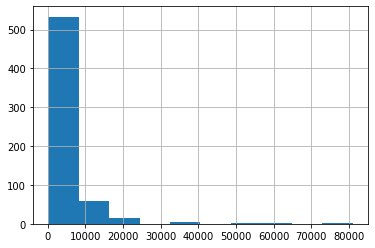

In [223]:
# Box Plot for understanding the distributions and to observe the outliers.

%matplotlib inline

# Histogram of variable ApplicantIncome

df['ApplicantIncome'].hist()


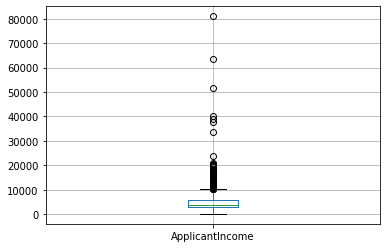

In [224]:
# Box Plot for variable ApplicantIncome of  data set

df.boxplot(column='ApplicantIncome')

The above Box Plot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.


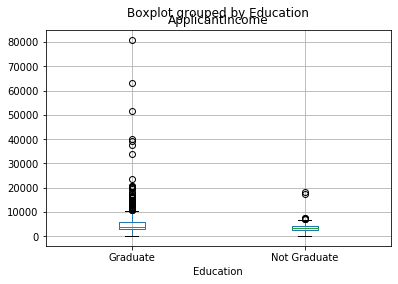

In [225]:
# Box Plot for variable ApplicantIncome by variable Education of data set

df.boxplot(column='ApplicantIncome', by = 'Education')

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers

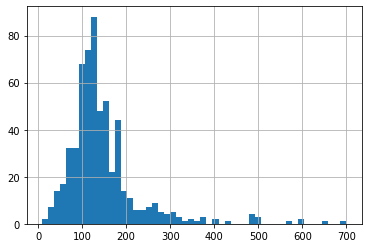

In [226]:
# Histogram of variable LoanAmount

df['LoanAmount'].hist(bins=50)


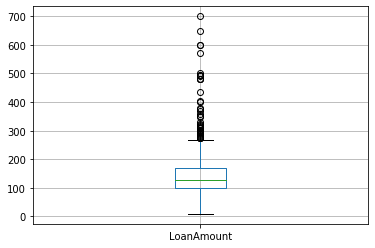

In [227]:
# Box Plot for variable LoanAmount of  data set

df.boxplot(column='LoanAmount')

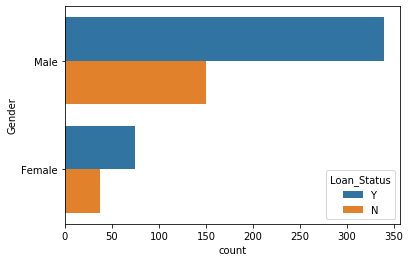

In [228]:
sns.countplot(y='Gender',hue='Loan_Status',data=df)


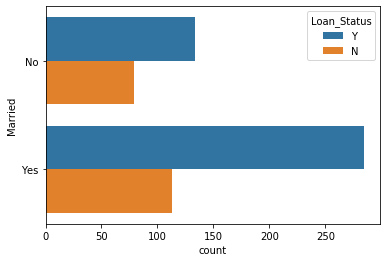

In [229]:
sns.countplot(y='Married',hue='Loan_Status',data=df)

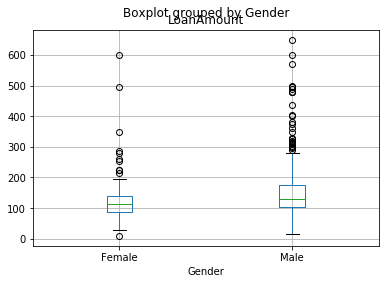

In [230]:
# Box Plot for variable LoanAmount by variable Gender of  data set

df.boxplot(column='LoanAmount', by = 'Gender')

LoanAmount has missing as well as extreme values, while ApplicantIncome has a few extreme values.

# Understanding Distribution of Categorical Variables

In [231]:
# Loan approval rates in absolute numbers
loan_approval = df['Loan_Status'].value_counts()['Y']
print(loan_approval)

422


In [232]:
# Credit History and Loan Status
pd.crosstab(df ['Credit_History'], df ['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [233]:
#Function to output percentage row wise in a cross table
def percentageConvert(ser):
    return ser/float(ser[-1])

# # Loan approval rate for customers having Credit_History (1)
#df['Y'] = pd.crosstab(df ["Credit_History"], df ["Loan_Status"], margins=True).apply(percentageConvert, axis=1)
#loan_approval_with_Credit_1 = df['Y'][1]
#print(loan_approval_with_Credit_1*100)

In [234]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [235]:
# Replace missing value of Self_Employed with more frequent category
df['Self_Employed'].fillna('No',inplace=True)

# Outliers of LoanAmount and Applicant Income

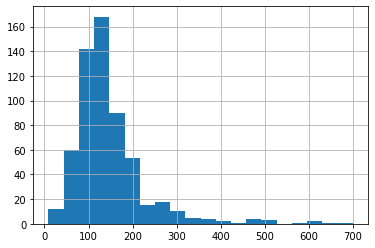

In [236]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Looking at the distribtion of TotalIncome
df['LoanAmount'].hist(bins=20)

The extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

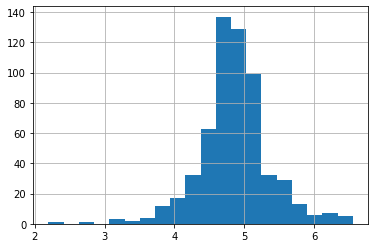

In [237]:
# Perform log transformation of TotalIncome to make it closer to normal
df['LoanAmount_log'] = np.log(df['LoanAmount'])

# Looking at the distribtion of TotalIncome_log
df['LoanAmount_log'].hist(bins=20)

# Data Preparation for Model Building

sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. Before that we will fill all the missing values in the dataset.

In [238]:
# Impute missing values for Gender
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

# Impute missing values for Married
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Impute missing values for Dependents
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

# Impute missing values for Credit_History
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

# Convert all non-numeric values to number
cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

for var in cat:
    le = preprocessing.LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area          int32
Loan_Status           object
TotalIncome          float64
LoanAmount_log       float64
dtype: object

# Generic Classification Function

In [239]:
#Import models from scikit learn module:
from sklearn import metrics
from sklearn.cross_validation import KFold

#Generic function for making a classification model and accessing performance:

def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

ModuleNotFoundError: No module named 'sklearn.cross_validation'

# Model Building

In [ ]:
#Combining both train 

#Create a flag for Train 
df['Type']='Train' 

fullData = pd.concat([df], axis=0)

#Look at the available missing values in the dataset
fullData.isnull().sum()

In [ ]:
#Identify categorical and continuous variables
ID_col = ['Loan_ID']
target_col = ["Loan_Status"]
cat_cols = ['Credit_History','Dependents','Gender','Married','Education','Property_Area','Self_Employed']
ID_col
target_col
cat_cols

In [ ]:
#Imputing Missing values with mean for continuous variable
fullData['LoanAmount']=fullData['LoanAmount'].fillna(fullData['LoanAmount'].mean(), inplace=True)
fullData['LoanAmount_log'].fillna(fullData['LoanAmount_log'].mean(), inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mean(), inplace=True)
fullData['ApplicantIncome'].fillna(fullData['ApplicantIncome'].mean(), inplace=True)
fullData['CoapplicantIncome'].fillna(fullData['CoapplicantIncome'].mean(), inplace=True)

#Imputing Missing values with mode for categorical variables
fullData['Gender'].fillna(fullData['Gender'].mode()[0], inplace=True)
fullData['Married'].fillna(fullData['Married'].mode()[0], inplace=True)
fullData['Dependents'].fillna(fullData['Dependents'].mode()[0], inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mode()[0], inplace=True)
fullData['Credit_History'].fillna(fullData['Credit_History'].mode()[0], inplace=True)




In [ ]:
#Create a new column as Total Income

fullData['TotalIncome']=fullData['ApplicantIncome'] + fullData['CoapplicantIncome']

fullData['TotalIncome_log'] = np.log(fullData['TotalIncome'])

#Histogram for Total Income
fullData['TotalIncome_log'].hist(bins=20)

In [ ]:
#create label encoders for categorical features
for var in cat_cols:
    number = LabelEncoder()
    fullData[var] = number.fit_transform(fullData[var].astype('str'))

train_modified=fullData[fullData['Type']=='Train']

train_modified["Loan_Status"] = number.fit_transform(train_modified["Loan_Status"].astype('str'))
train_modified["Loan_Status"]


# Logistic Regression Model

The chances of getting a loan will be higher for:

Applicants having a credit history (we observed this in exploration.)
Applicants with higher applicant and co-applicant incomes
Applicants with higher education level
Properties in urban areas with high growth perspectives
So let’s make our model with ‘Credit_History’, 'Education' & 'Gender'

In [240]:
from sklearn.linear_model import LogisticRegression


predictors_Logistic=['Credit_History','Education','Gender']

x_train = train_modified[list(predictors_Logistic)].values
y_train = train_modified["Loan_Status"].values
x_train
y_train


array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [241]:
from sklearn.linear_model import LogisticRegression


predictors_Logistic=['Credit_History','Education','Gender']

x_train = train_modified[list(predictors_Logistic)].values
y_train = train_modified["Loan_Status"].values
x_train
y_train



array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [242]:
y = df["Loan_Status"]
X = df.drop("Loan_Status", axis = 1)
y
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_log
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1,2,5849.0,NaN
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,6091.0,4.852030
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,3000.0,4.189655
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,4941.0,4.787492
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,6000.0,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,2900.0,4.262680
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1,0,4106.0,3.688879
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,8312.0,5.533389
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,7583.0,5.231109


In [243]:

from sklearn.linear_model import LogisticRegression


In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_log
454,LP002453,1,0,0,0,1,7085,0.0,84.0,360.0,1,1,7085.0,4.430817
52,LP001164,0,0,0,0,0,4230,0.0,112.0,360.0,1,1,4230.0,4.718499
536,LP002734,1,1,0,0,0,6133,3906.0,324.0,360.0,1,2,10039.0,5.780744
469,LP002505,1,1,0,0,0,4333,2451.0,110.0,360.0,1,2,6784.0,4.700480
55,LP001194,1,1,2,0,0,2708,1167.0,97.0,360.0,1,1,3875.0,4.574711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,LP002112,1,1,2,0,1,2500,4600.0,176.0,360.0,1,0,7100.0,5.170484
376,LP002219,1,1,3,0,0,8750,4996.0,130.0,360.0,1,0,13746.0,4.867534
278,LP001907,1,1,0,0,0,14583,0.0,436.0,360.0,1,1,14583.0,6.077642
466,LP002500,1,1,3,1,0,2947,1664.0,70.0,180.0,0,2,4611.0,4.248495


In [261]:
 #Create logistic regression object
model = LogisticRegression()

# Train the model using the training sets
model.fit(x_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [264]:
predicted= model.predict(X_test)

ValueError: could not convert string to float: 'LP002453'

# Decision Tree

In [265]:

from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
x_train
y_train

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_log
454,LP002453,1,0,0,0,1,7085,0.0,84.0,360.0,1,1,7085.0,4.430817
52,LP001164,0,0,0,0,0,4230,0.0,112.0,360.0,1,1,4230.0,4.718499
536,LP002734,1,1,0,0,0,6133,3906.0,324.0,360.0,1,2,10039.0,5.780744
469,LP002505,1,1,0,0,0,4333,2451.0,110.0,360.0,1,2,6784.0,4.700480
55,LP001194,1,1,2,0,0,2708,1167.0,97.0,360.0,1,1,3875.0,4.574711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,LP002112,1,1,2,0,1,2500,4600.0,176.0,360.0,1,0,7100.0,5.170484
376,LP002219,1,1,3,0,0,8750,4996.0,130.0,360.0,1,0,13746.0,4.867534
278,LP001907,1,1,0,0,0,14583,0.0,436.0,360.0,1,1,14583.0,6.077642
466,LP002500,1,1,3,1,0,2947,1664.0,70.0,180.0,0,2,4611.0,4.248495


In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_log
454,LP002453,1,0,0,0,1,7085,0.0,84.0,360.0,1,1,7085.0,4.430817
52,LP001164,0,0,0,0,0,4230,0.0,112.0,360.0,1,1,4230.0,4.718499
536,LP002734,1,1,0,0,0,6133,3906.0,324.0,360.0,1,2,10039.0,5.780744
469,LP002505,1,1,0,0,0,4333,2451.0,110.0,360.0,1,2,6784.0,4.700480
55,LP001194,1,1,2,0,0,2708,1167.0,97.0,360.0,1,1,3875.0,4.574711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,LP002112,1,1,2,0,1,2500,4600.0,176.0,360.0,1,0,7100.0,5.170484
376,LP002219,1,1,3,0,0,8750,4996.0,130.0,360.0,1,0,13746.0,4.867534
278,LP001907,1,1,0,0,0,14583,0.0,436.0,360.0,1,1,14583.0,6.077642
466,LP002500,1,1,3,1,0,2947,1664.0,70.0,180.0,0,2,4611.0,4.248495


In [266]:
y_pred=tree.predict(X_test)

ValueError: could not convert string to float: 'LP002453'

In [201]:
from sklearn.linear_model import LinearRegression


predictors_Linear=['Credit_History','Education','Gender']

x_train = train_modified[list(predictors_Linear)].values
y_train = train_modified["Loan_Status"].values
x_train
y_train

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [252]:
# Create logistic regression object
model = LogisticRegression()

# Train the model using the training sets
model.fit(x_train, y_train)

#Predict Output
predicted= model.predict(x_test)

#Reverse encoding for predicted outcome
predicted = number.inverse_transform(predicted)

#Store it to test dataset
test_modified['Loan_Status']=predicted

outcome_var = 'Loan_Status'

classification_model(model, df,predictors_Logistic,outcome_var)

test_modified.to_csv("Logistic_Prediction.csv",columns=['Loan_ID','Loan_Status'])

ValueError: Found input variables with inconsistent numbers of samples: [614, 491]

In [253]:
from sklearn.linear_model import LinearRegression


predictors_Linear=['Credit_History','Education','Gender']

x_train = train_modified[list(predictors_Linear)].values
y_train = train_modified["Loan_Status"].values
x_train
y_train

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

ValueError: could not convert string to float: 'LP001938'

In [183]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [614, 491]

In [187]:
y = df[‘Loan_Status’]
X = df.drop(‘Loan_Status’, axis = 1)

SyntaxError: invalid character in identifier (<ipython-input-187-454f675d6fbc>, line 1)